In [2]:
import numpy as np
import matplotlib.pyplot as plt

Cubic spline interpolation 

(x,y) = [(-1.5, -14.101419947171719), (-1.4727272727272727, -10.16418589581345), (-1.4454545454545455, -7.936361221013933), (-1.4181818181818182, -6.50150629649814), (-1.3909090909090909, -5.498945942661888), (-1.3636363636363638, -4.757935879343402), (-1.3363636363636364, -4.1871846522070895), (-1.309090909090909, -3.733454104388989), (-1.2818181818181817, -3.3636026852157648), (-1.2545454545454546, -3.055920012145494), (-1.2272727272727273, -2.795589184108029), (-1.2, -2.5721516221263188), (-1.1727272727272728, -2.3780140493358215), (-1.1454545454545455, -2.2075298596869675), (-1.1181818181818182, -2.0564126027991416), (-1.0909090909090908, -1.9213494621801213), (-1.0636363636363637, -1.7997394436552498), (-1.0363636363636364, -1.689511725142914), (-1.009090909090909, -1.5889969229054144), (-0.9818181818181818, -1.496834122018665), (-0.9545454545454546, -1.411902591499532), (-0.9272727272727272, -1.333270860959819), (-0.9, -1.2601582175503392), (-0.872727

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

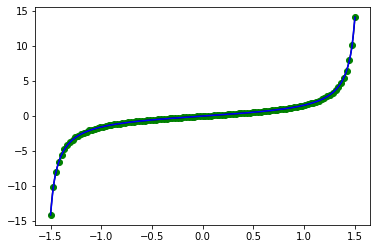

In [4]:
print("Cubic spline interpolation \n")

import numpy as np
import matplotlib.pyplot as plt

plotdots = 10**4

def input():

    #def f(x): return 0
    #LEFT, DOTS_COUNT, RIGHT = -1, 3, 1
    
    #def f(x): return 1 / (1 + x**2)
    #LEFT, DOTS_COUNT, RIGHT = -5, 11, 5
    
    def f(x): return np.tan(x)
    LEFT, DOTS_COUNT, RIGHT = -1.5, 111, 1.5

    #def f(x): return np.sin(4 * x)
    #LEFT, DOTS_COUNT, RIGHT = -1, 7, 1
    
    #def f(x): return np.sin(4 * x)
    #LEFT, DOTS_COUNT, RIGHT = -1, 5, 1
    
    
    #def f(x): return np.sqrt(x)
    #LEFT, DOTS_COUNT, RIGHT = 0, 5, 4
    
    dots = []
    for i in range(DOTS_COUNT):
        x = LEFT + (RIGHT - LEFT) * i / (DOTS_COUNT - 1)
        y = f(x)
        dots += [(x, y)]
    
    return dots, f

dots, f = input()
(x, y) = map(list, zip(*dots))
print("(x,y) =", dots, '\n')

plt.plot(x, y, 'og')
xplot = np.linspace(min(x), max(x), plotdots)

yplot = [f(xdot) for xdot in xplot]
plt.plot(xplot, yplot, 'black')


def tridiag_solve(A, b):
    A = A.copy()
    b = b.copy()
    n = len(A)

    A[0][1] /= A[0][0]
    for i in range(1, n-1):
        A[i][i+1] /= (A[i][i] - A[i][i-1] * A[i-1][i])

    b[0] /= A[0][0]
    for i in range(1, n):
        b[i] = (b[i] - A[i][i-1] * b[i-1]) / (A[i][i] - A[i][i-1] * A[i-1][i])

    x = np.zeros(n)
    x[-1] = b[-1]
    for i in range(n-2, -1, -1):
        x[i] = b[i] - A[i][i+1] * x[i+1]

    return x


def Spline(dots):

    n = len(dots) - 1
    (x, y) = map(list, zip(*dots))
    
    h = [None]
    for i in range(1,n+1):
        h += [ x[i] - x[i-1] ]
    
    A = [[None] * (n) for i in range(n)]
    for i in range(1,n):
        for j in range(1,n):
            A[i][j] = 0.0
    for i in range(1,n-1):
        A[i+1][i] = h[i+1]
    for i in range(1,n):
        A[i][i] = 2 * (h[i] + h[i+1])
    for i in range(1,n-1):
        A[i][i+1] = h[i+1]
    
    F = []
    for i in range(1,n):
        F += [ 3 * ( (y[i+1] - y[i]) / h[i+1] - (y[i] - y[i-1]) / h[i]) ]

    A = [A[i][1:] for i in range(len(A)) if i]
        
    c = tridiag_solve(A, F)
    c = [0.0] + list(c) + [0.0]
    
    def evaluate(xdot):
        for i in range(1, len(x)):
            if x[i-1] <= xdot <= x[i]:
                val = 0
                val += y[i]
                b = (y[i] - y[i-1]) / h[i] + (2 * c[i] + c[i-1]) * h[i] / 3
                val += b * (xdot - x[i])
                val += c[i] * ((xdot - x[i]) ** 2)
                d = (c[i] - c[i-1]) / (3 * h[i])
                val += d * ((xdot - x[i]) ** 3)
                return val
        return None
    
    def cout():
        print("Cubic spline:", '\n')
        for i in range(1, len(x)):
            val = 0
            b = (y[i] - y[i-1]) / h[i] + (2 * c[i] + c[i-1]) * h[i] / 3
            d = (c[i] - c[i-1]) / (3 * h[i])
            print(x[i-1], x[i], "->")
            print(np.poly1d([d, c[i], b, y[i]]), '\n')
    
    return evaluate, cout
    

spl, cout = Spline(dots)
yplot = [spl(xdot) for xdot in xplot]
plt.plot(xplot, yplot, 'b')

cout()

xdot = 2
print(f"          f({xdot}) =", f(xdot))
print(f"CubicSpline({xdot}) =", spl(xdot))
print(f"      delta({xdot}) =", abs(f(xdot) - spl(xdot)))

plt.show()

In [6]:
%matplotlib inline

In [4]:
np.sqrt(2)

1.4142135623730951